In [1]:
pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.6.1 which is incompatible.


In [2]:
!pip install wordcloud

In [3]:
pip install nltk

In [4]:
import pandas as pd
import numpy as np
import string
import spacy
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
!python -m spacy download en_core_web_sm
nlp=spacy.load('en_core_web_sm')

2023-08-10 13:29:07.129515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
!python -m spacy download en_core_web_md
nlp=spacy.load('en_core_web_md')

2023-08-10 13:29:39.694411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 6.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [7]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [8]:
tweet=pd.read_csv('Elon_musk.csv', encoding='latin-1', error_bad_lines=False)
tweet

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
tweet.drop('Unnamed: 0', axis=1, inplace=True)
tweet.rename({'Text':'Tweets'}, axis=1, inplace=True)
tweet.head()

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


**Text Pre-Processing**

In [10]:
def lowercase(text):
  return text.lower()

tweet['Clean_Tweets']=tweet['Tweets'].apply(lowercase)
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,@kunalb11 im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,@id_aa_carmack ray tracing on cyberpunk with h...
2,@joerogan @Spotify Great interview!,@joerogan @spotify great interview!
3,@gtera27 Doge is underestimated,@gtera27 doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,@teslacn congratulations tesla china for amazi...


In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def no_usernames_and_punctuation(text):
  no_username= re.sub(r'@\w+', '', text)

  translator=str.maketrans('', '', string.punctuation)
  no_username= no_username.translate(translator)
  return no_username

tweet['Clean_Tweets']=tweet['Clean_Tweets'].apply(lambda x: no_usernames_and_punctuation(x))
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [13]:
def no_url(text):
  return re.sub(r'http\S+', '',text)

tweet['Clean_Tweets']=tweet['Clean_Tweets'].apply(lambda x: no_url(x))
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [14]:
def clean_text(text):
  text= re.sub('[0-9' ']+', '', text)
  text= re.sub('\[.*?\]', '', text)
  text= re.sub('\w*\d\w*', '', text)

  return text

tweet['Clean_Tweets']=tweet['Clean_Tweets'].apply(lambda x: clean_text(x))
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [15]:
def no_emoji(text):
  no_emoji_text= re.compile("["
            "\U0001F600-\U0001F64F"
            "\U0001F300-\U0001F5FF"
            "\U0001F680-\U0001F6FF"
            "\U0001F700-\U0001F77F"
            "\U0001F780-\U0001F7FF"
            "\U0001F800-\U0001F8FF"
            "\U0001F900-\U0001F9FF"
            "\U0001FA00-\U0001FA6F"
            "\U0001FA70-\U0001FAFF"
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251""]+", flags=re.UNICODE)
  return no_emoji_text.sub(r'', text)

tweet['Clean_Tweets']=tweet['Clean_Tweets'].apply(lambda x: no_emoji(x))
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [16]:
tweet=tweet[tweet['Clean_Tweets']!='']
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [17]:
tweet.drop_duplicates(subset=['Clean_Tweets'], keep=False)
tweet.head()

,Tweets,Clean_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...


In [18]:
tweet=tweet.reset_index(drop=True)

In [19]:
from nltk.tokenize import word_tokenize

tweet['Tokenized']=tweet['Clean_Tweets'].apply(lambda x: word_tokenize(x))
tweet.head()

,Tweets,Clean_Tweets,Tokenized
0,@kunalb11 Im an alien,im an alien,"[im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,"[ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,@joerogan @Spotify Great interview!,great interview,"[great, interview]"
3,@gtera27 Doge is underestimated,doge is underestimated,"[doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,"[congratulations, tesla, china, for, amazing, ..."


In [20]:
tweet.drop('Tokenized', axis=1, inplace=True)

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
addi_words=['\x92','rt','ye','yeah','haha','yes','im','its']
my_stop_words.extend(addi_words)

tweet['Main_words']=tweet['Clean_Tweets'].apply(lambda x: ' '.join(word for word in x.split() if word not in my_stop_words))
tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweets,Clean_Tweets,Main_words
0,@kunalb11 Im an alien,im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...


In [22]:
tweet_tokenized=tweet['Main_words'].apply(lambda x: x.split())
tweet_tokenized

0                                                 [alien]
1        [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                      [great, interview]
3                                  [doge, underestimated]
4       [congratulations, tesla, china, amazing, execu...
                              ...                        
1972    [true, sounds, surreal, negative, propaganda, ...
1973    [make, sure, read, ur, terms, amp, conditions,...
1974                                    [samwise, gamgee]
1975                          [altho, dumb, dumber, ufuf]
1976                           [progress, update, august]
Name: Main_words, Length: 1977, dtype: object

In [23]:
from nltk.stem import WordNetLemmatizer

words=WordNetLemmatizer()
tweet_tokenized=tweet_tokenized.apply(lambda x: [words.lemmatize(word) for word in x])
tweet_tokenized

0                                                 [alien]
1        [ray, tracing, cyberpunk, hdr, nextlevel, tried]
2                                      [great, interview]
3                                  [doge, underestimated]
4       [congratulation, tesla, china, amazing, execut...
                              ...                        
1972    [true, sound, surreal, negative, propaganda, s...
1973    [make, sure, read, ur, term, amp, condition, c...
1974                                    [samwise, gamgee]
1975                          [altho, dumb, dumber, ufuf]
1976                           [progress, update, august]
Name: Main_words, Length: 1977, dtype: object

In [24]:
for i, tokens in enumerate(tweet_tokenized):
  tweet_tokenized[i]=' '.join(tokens)

tweet['Main_words']=tweet_tokenized
tweet.head()

,Tweets,Clean_Tweets,Main_words
0,@kunalb11 Im an alien,im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,ray tracing cyberpunk hdr nextlevel tried
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulation tesla china amazing execution l...


In [25]:
w=tweet_tokenized.copy()
W=' '.join(w)

In [26]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
  plt.figure(figsize=(60, 40))
  plt.imshow(wordcloud)
  plt.axis("off")

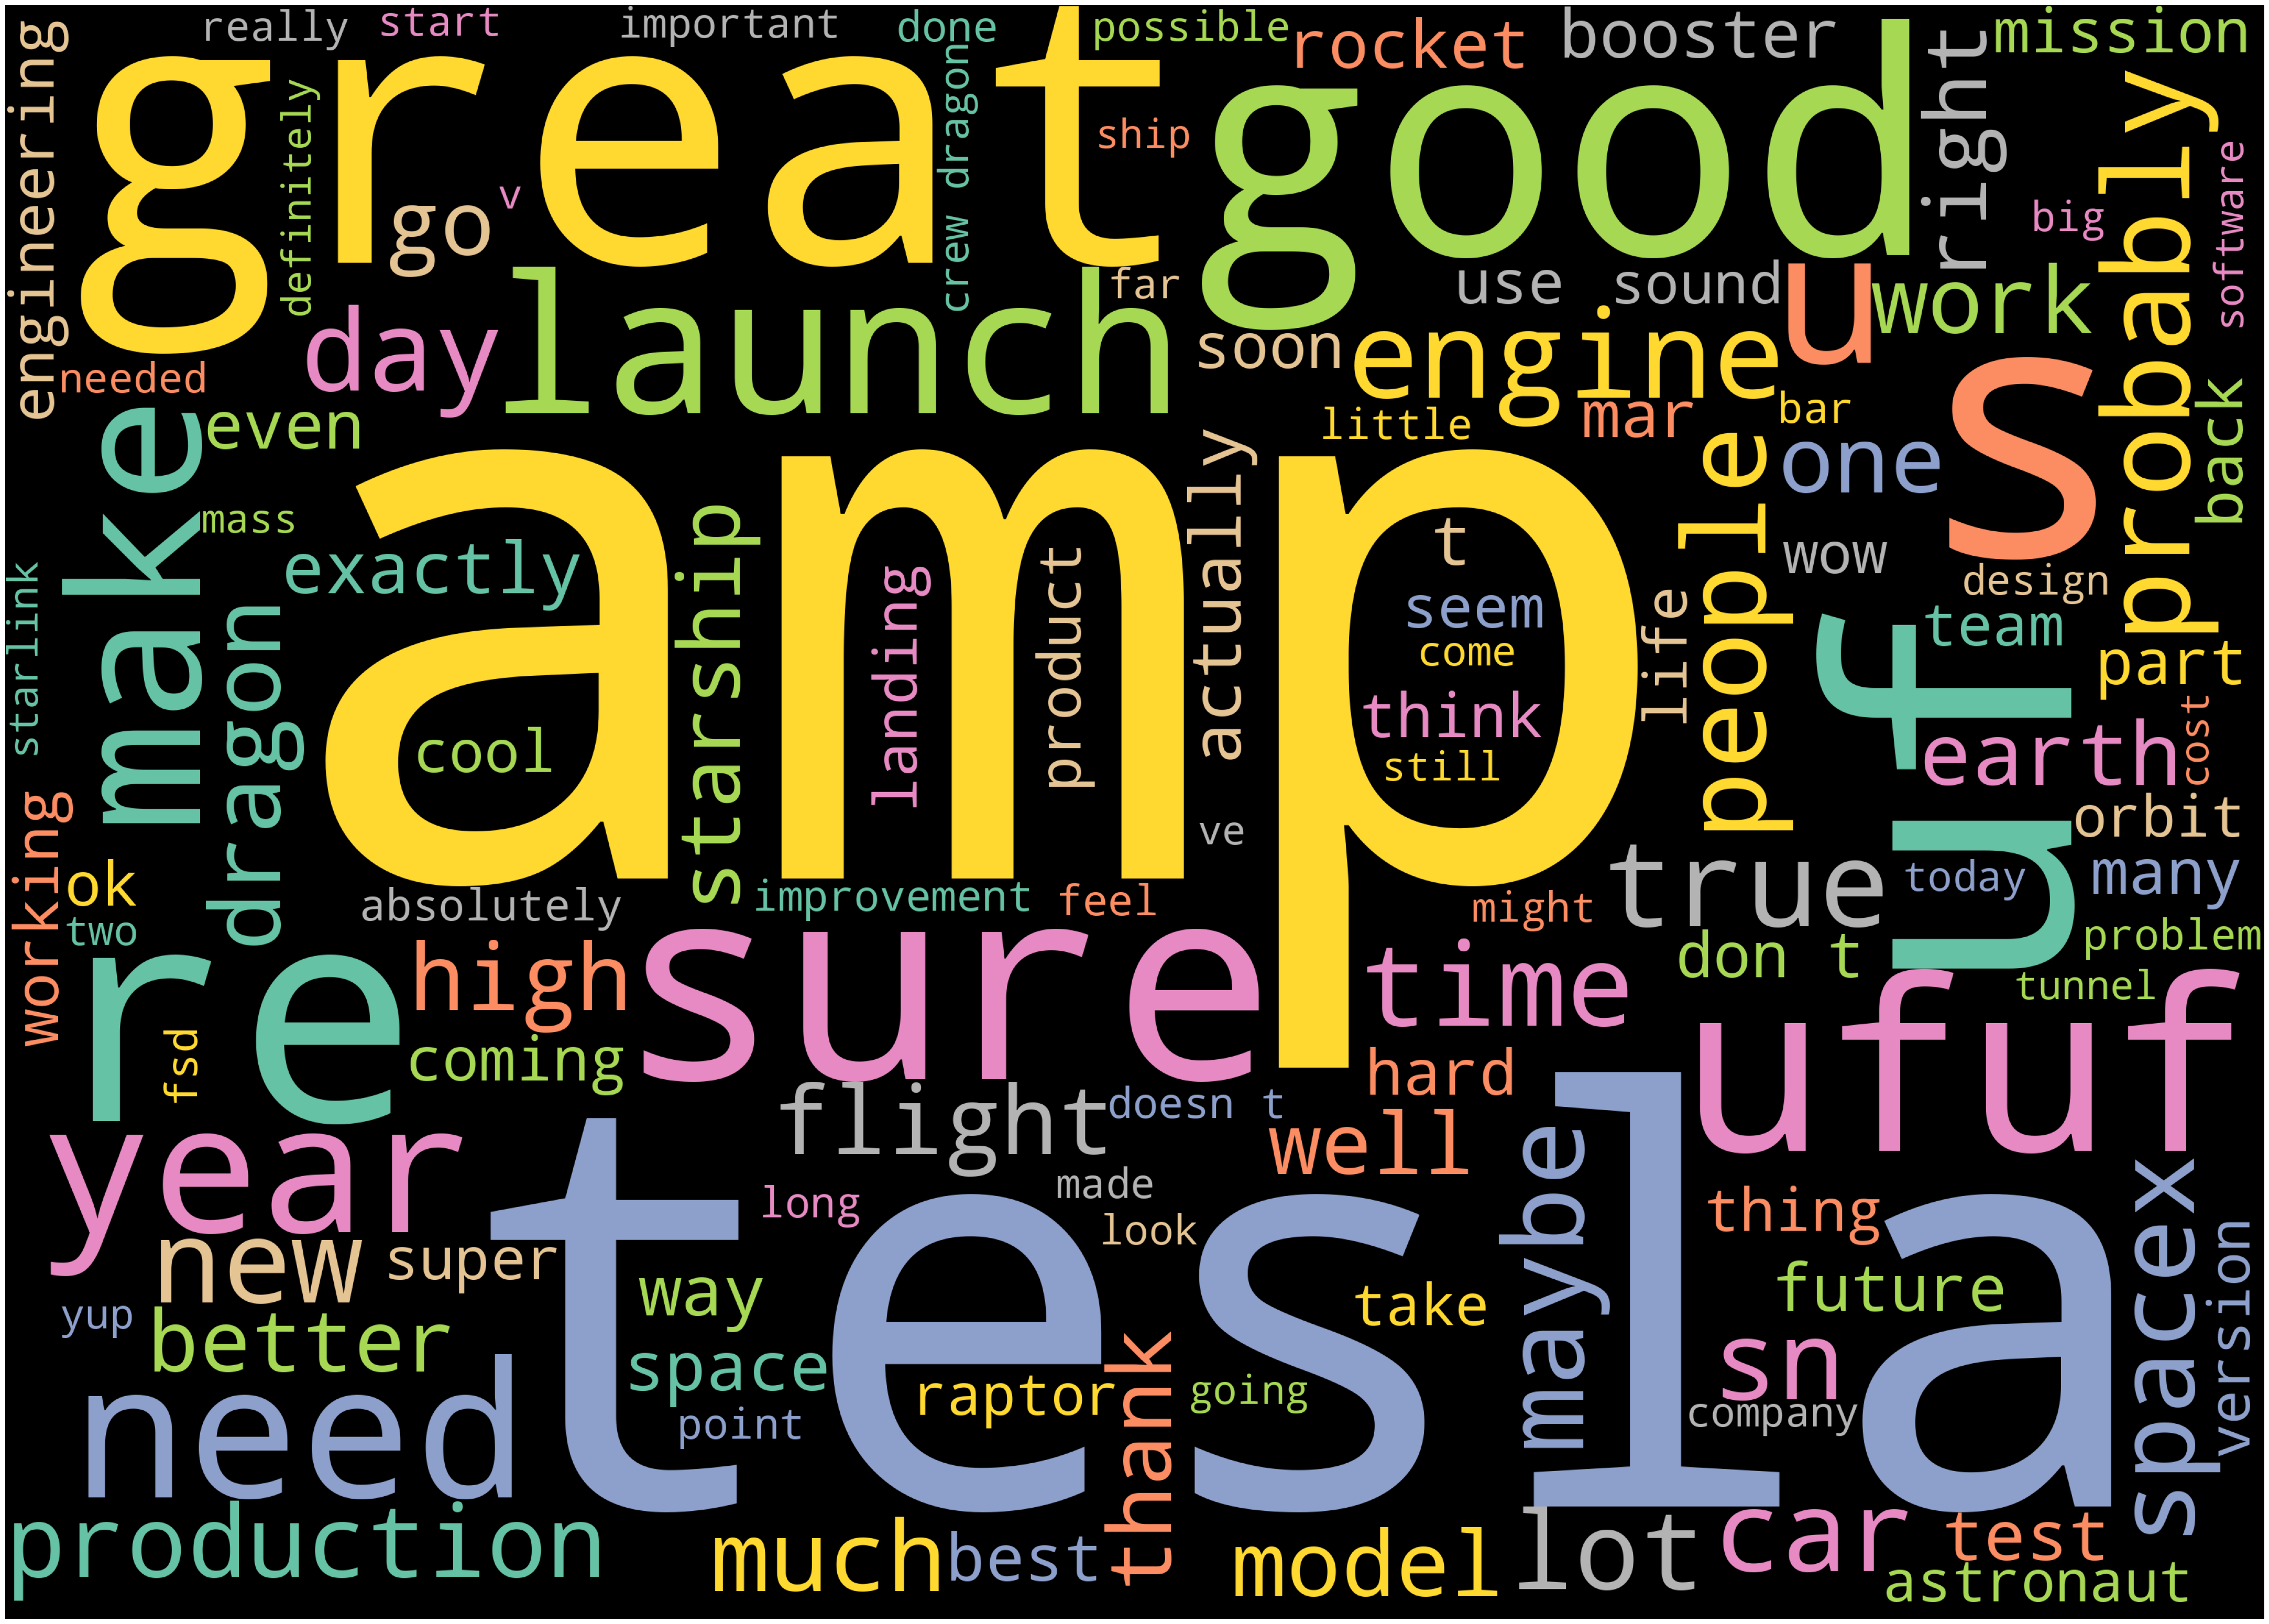

In [27]:
from wordcloud import WordCloud
import seaborn as sns

wordcloud = WordCloud(width = 3500,
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(W)
plot_cloud(wordcloud)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vec=CountVectorizer()
X=vec.fit_transform(tweet['Main_words'])
df=pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df

,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,you,young,yup,zealand,zenit,zero,zip,zon,zone,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer()
TF_IDF=tf_idf.fit_transform(tweet['Main_words'])
print(TF_IDF)

  (0, 92)	1.0
  (1, 3119)	0.3637862041791644
  (1, 1994)	0.41017971061272573
  (1, 1352)	0.4323808148300837
  (1, 711)	0.3722266722726818
  (1, 3098)	0.4323808148300837
  (1, 2396)	0.4323808148300837
  (2, 1563)	0.8536458673877874
  (2, 1295)	0.5208538500306512
  (3, 3212)	0.7715829786066485
  (3, 842)	0.6361286875503195
  (4, 994)	0.3083123632718213
  (4, 1993)	0.2923176227640908
  (4, 3445)	0.2671878511866964
  (4, 1652)	0.344263973395039
  (4, 1019)	0.43904569939561405
  (4, 118)	0.34956309259535284
  (4, 510)	0.377964317695002
  (4, 3008)	0.2226656683409101
  (4, 608)	0.34956309259535284
  (5, 2113)	0.6290079597897106
  (5, 1991)	0.40570743431692413
  (5, 1334)	0.5414984469131966
  (5, 3445)	0.3827922364047637
  (6, 1056)	0.4766580199581545
  :	:
  (1972, 1114)	0.3488952777601625
  (1972, 2776)	0.2817517516559552
  (1972, 2853)	0.25640884730232877
  (1972, 904)	0.3096188328230091
  (1972, 1980)	0.3380875840387888
  (1972, 123)	0.1591795093887138
  (1972, 3127)	0.2424753067188018
  

In [30]:
freq=pd.Series(' '.join(tweet['Main_words']).split()).value_counts()[0:10]
freq

amp       218
tesla      98
great      76
launch     56
uf         53
good       52
year       48
sure       43
ufuf       42
make       41
dtype: int64

In [31]:
from textblob import TextBlob

tweet['Polarity']=tweet['Main_words'].apply(lambda x: TextBlob(x).sentiment[0])
tweet.head()

,Tweets,Clean_Tweets,Main_words,Polarity
0,@kunalb11 Im an alien,im an alien,alien,-0.25
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextleve...,ray tracing cyberpunk hdr nextlevel tried,0.00
2,@joerogan @Spotify Great interview!,great interview,great interview,0.80
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,0.00
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulation tesla china amazing execution l...,0.20


**Top 5 positive tweets**

In [32]:
tweet[tweet['Polarity']>0].head()

,Tweets,Clean_Tweets,Main_words,Polarity
2,@joerogan @Spotify Great interview!,great interview,great interview,0.800000
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulation tesla china amazing execution l...,0.200000
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy new year ox,0.468182
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,thanks,0.200000
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely,0.250000


In [33]:
tweet.drop('Clean_Tweets', axis=1, inplace=True)

**Sentiment Intensity Analyzer**

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [35]:
def Fetch_Sentiments_by_SIA(text):
  sia=SentimentIntensityAnalyzer()
  polarity_score=sia.polarity_scores(text)
  return 'neg' if polarity_score['neg'] > polarity_score['pos'] else 'pos'

In [36]:
sentiments=tweet['Main_words'].apply(lambda x: Fetch_Sentiments_by_SIA(x))
pd.DataFrame(sentiments.value_counts())

,Main_words
pos,1772
neg,205


In [37]:
def get_sentiment_score(text):
    sia=SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

tweet['Sentiment_score'] = tweet['Main_words'].apply(get_sentiment_score)

def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif -0.05 < compound_score < 0.05:
        return "Neutral"
    else:
        return "Negative"

tweet['Sentiment_label'] = tweet['Sentiment_score'].apply(get_sentiment_label)
tweet


,Tweets,Main_words,Polarity,Sentiment_score,Sentiment_label
0,@kunalb11 Im an alien,alien,-0.250000,0.0000,Neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr nextlevel tried,0.000000,0.0000,Neutral
2,@joerogan @Spotify Great interview!,great interview,0.800000,0.6249,Positive
3,@gtera27 Doge is underestimated,doge underestimated,0.000000,-0.2732,Negative
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,0.200000,0.8271,Positive
...,...,...,...,...,...
1972,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still a...,0.152381,-0.0000,Neutral
1973,@PPathole Make sure to read ur terms &amp; con...,make sure read ur term amp condition clicking ...,0.500000,0.5994,Positive
1974,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,0.000000,0.0000,Neutral
1975,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber ufuf,-0.375000,-0.7003,Negative


In [38]:
tweet.groupby('Sentiment_label').count()['Tweets'].reset_index().sort_values(by='Tweets', ascending=False)

,Sentiment_label,Tweets
1,Neutral,1010
2,Positive,766
0,Negative,201


<Axes: xlabel='Sentiment_label', ylabel='count'>

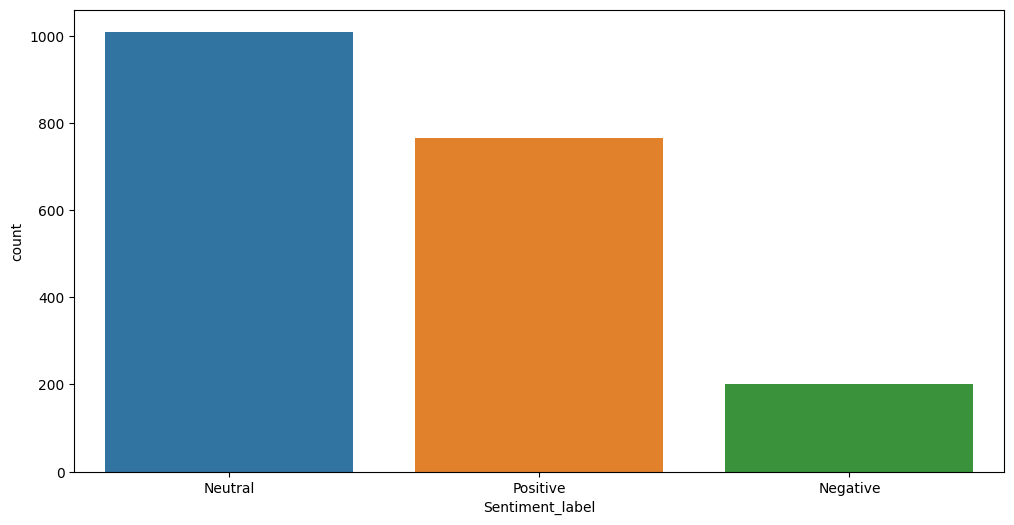

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'Sentiment_label' , data=tweet)